# Exercise 17

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

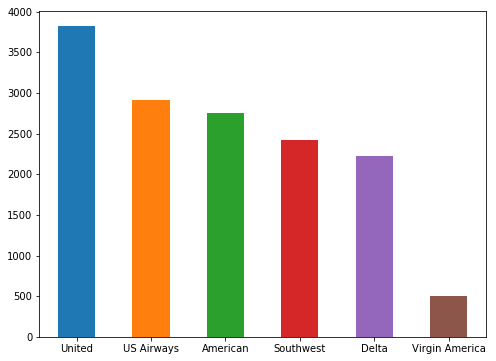

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

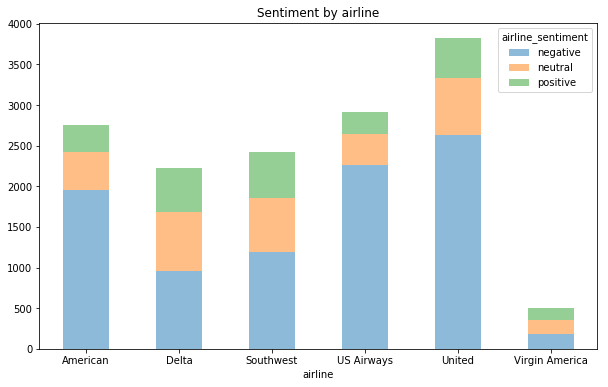

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 17.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [8]:
tweets[['text','airline_sentiment','airline_sentiment_confidence']].iloc[5]
tweets['text'].iloc[5]

"@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA"

In [9]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
vect = CountVectorizer()
X_dtm_train = vect.fit_transform(X_train)
#vect.get_feature_names()

In [11]:
X_dtm_train.toarray().shape

(9808, 12056)

In [12]:
import warnings
warnings.filterwarnings("ignore")
# use Random FOres to predict the star rating
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_jobs=-1) 
pd.Series(cross_val_score(rfc, X_dtm_train, y_train, cv=10, scoring='accuracy')).describe()

count    10.000000
mean      0.730112
std       0.012680
min       0.713265
25%       0.719782
50%       0.733300
75%       0.736694
max       0.753564
dtype: float64

Text(0, 0.5, 'NEG_RMSE')

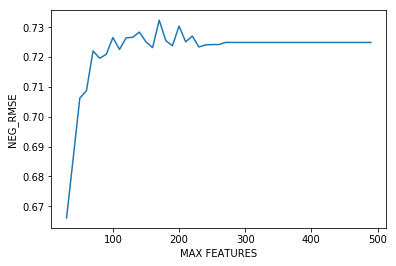

In [13]:
max_depth_range = range(30, 500, 10)
RMSE_scores_featu = []

for depth in max_depth_range:
    rfc = RandomForestClassifier(max_depth=depth, random_state=42, n_jobs=-1) 
    RMSE_scores_featu.append(cross_val_score(rfc, X_dtm_train, y_train, cv=4, scoring='accuracy').mean())

#best_maxfeatures = feature_range[RMSE_scores_featu.index(max(RMSE_scores_featu))]
#print ("best_maxfeatures: ", best_maxfeatures)
plt.plot(max_depth_range, RMSE_scores_featu)
plt.xlabel('MAX FEATURES')
plt.ylabel('NEG_RMSE')

In [14]:
rfc = RandomForestClassifier(max_depth=100, random_state=42, n_jobs=-1) 
X_dtm_test = vect.transform(X_test)

In [15]:
rfc.fit(X_dtm_train, y_train)
y_pred=rfc.predict(X_dtm_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7423427152317881

# Exercise 17.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [17]:
# remove English stop words
vect2 = CountVectorizer(stop_words='english')
#print(vect.get_stop_words())
X_dtm2_train = vect2.fit_transform(X_train)

In [18]:
X_dtm2_train.toarray().shape

(9808, 11777)

In [19]:
# use Random Forest to predict the star rating
rfc2 = RandomForestClassifier(max_depth=100,random_state=42, n_jobs=-1) 
pd.Series(cross_val_score(rfc2, X_dtm2_train, y_train, cv=10, scoring='accuracy')).describe()

count    10.000000
mean      0.714823
std       0.008988
min       0.700000
25%       0.709957
50%       0.715083
75%       0.722592
max       0.726531
dtype: float64

In [20]:
X_dtm_test2 = vect2.transform(X_test)
rfc2.fit(X_dtm2_train, y_train)
y_pred=rfc2.predict(X_dtm_test2)

In [21]:
accuracy_score(y_test, y_pred)

0.7330298013245033

# Exercise 17.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

In [22]:
vect = CountVectorizer(ngram_range=(1, 4))
X_dtm_train = vect.fit_transform(X_train)
X_dtm_train.shape

(9808, 338471)

In [23]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1) 
pd.Series(cross_val_score(rfc, X_dtm_train, y_train, cv=10, scoring='accuracy')).describe()

count    10.000000
mean      0.715125
std       0.014785
min       0.679592
25%       0.710859
50%       0.719817
75%       0.720622
max       0.730612
dtype: float64

In [24]:
X_dtm_test = vect.transform(X_test)

In [ ]:
rfc.fit(X_dtm_train, y_train)
y_pred=rfc.predict(X_dtm_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7336506622516556

In [ ]:
vect2 = CountVectorizer(ngram_range=(1, 4),stop_words='english')
X_dtm2_train = vect2.fit_transform(X_train)

In [ ]:
rfc2 = RandomForestClassifier(random_state=42, n_jobs=-1) 
pd.Series(cross_val_score(rfc2, X_dtm2_train, y_train, cv=10, scoring='accuracy')).describe()

count    10.000000
mean      0.711560
std       0.010607
min       0.697248
25%       0.707082
50%       0.710646
75%       0.715816
max       0.733198
dtype: float64

In [ ]:
X_dtm_test2 = vect2.transform(X_test)
rfc2.fit(X_dtm2_train, y_train)
y_pred=rfc2.predict(X_dtm_test2)

In [ ]:
max_depth_range = range(30, 500, 10)
RMSE_scores_featu = []

for depth in max_depth_range:
    rfc = RandomForestClassifier(max_depth=depth, random_state=42, n_jobs=-1) 
    RMSE_scores_featu.append(cross_val_score(rfc, X_dtm_train, y_train, cv=4, scoring='accuracy').mean())

#best_maxfeatures = feature_range[RMSE_scores_featu.index(max(RMSE_scores_featu))]
#print ("best_maxfeatures: ", best_maxfeatures)
plt.plot(max_depth_range, RMSE_scores_featu)
plt.xlabel('MAX FEATURES')
plt.ylabel('NEG_RMSE')

In [ ]:
accuracy_score(y_test, y_pred)

# Exercise 17.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [ ]:
vect4 = TfidfVectorizer()
X_dtm4_train = vect4.fit_transform(X_train)
X_dtm4_train.toarray()

In [ ]:
rfc4 = RandomForestClassifier(random_state=42, n_jobs=-1) 
pd.Series(cross_val_score(rfc4, X_dtm4_train, y_train, cv=10, scoring='accuracy')).describe()

In [ ]:
X_dtm4_test = vect4.transform(X_test)

In [ ]:
rfc4.fit(X_dtm4_train, y_train)
y_pred4=rfc4.predict(X_dtm4_test)

In [ ]:
accuracy_score(y_test, y_pred4)